In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ESN import ESN
from learn_esn import train_esn
import gc

In [24]:
data_length = 10000
input_length = 2000

In [25]:
df = pd.read_csv('../datasets/processed/windowed_250.csv')
data_train = df['usage'][:data_length].copy()
data_test = df['usage'][data_length:2*data_length]
del df
gc.collect()
data_train = np.array(data_train)
data_test = np.array(data_test)

In [51]:
# Hyperparameters
leaking_rate=0.2
Wscalar=1.3
WinScalar=1.2
Bscalar=0.0
alpha = 2
#1.85 1.0999999999999999 1.3499999999999999

In [52]:
esn = ESN(1, 4000, 1, leaking_rate=leaking_rate, Wscalar=Wscalar, WinScalar=WinScalar, Bscalar=Bscalar)

In [53]:
train_esn(esn, data_train, input_length, alpha=alpha)

(7999, 4000)


([<matplotlib.lines.Line2D at 0x221894c4c70>],
 [<matplotlib.lines.Line2D at 0x221894c4550>])

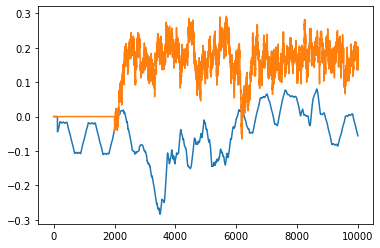

In [54]:
esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
output = [0] * (len(data_train)+1)
for i in range (len(data_train)):
    if i < input_length:
        esn.give_signal(data_train[i])
    else:
        output[i+1] = esn.get_output(0)
plt.plot(data_train), plt.plot(output)

In [55]:
mse = ((output[:len(data_train)] - data_train)**2).mean(axis=None)
mse

0.045093314889394484

In [27]:
'''
lowest = 10000
lowest_Ws = 0
lowest_Win = 0
lowest_bias = 0

for w in np.arange(0.35, 2.1, 0.25):
    Ws = w
    for i in np.arange(0.1, 2.1, 0.25):
        Win = i
        for b in np.arange(0.1, 2.1, 0.25):
            bias = b
            esn = ESN(1, 2000, 1, leaking_rate=1, Wscalar=Ws, WinScalar=Win, Bscalar=bias)
            train_esn(esn, data_train, input_length, alpha=alpha)
            esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
            output = [0] * (len(data_train) + 1)
            for i in range (len(data_train)):
                if i < input_length:
                    esn.give_signal(data_train[i])
                else:
                    output[i+1] = esn.get_output(0)
            mse = ((output[:len(data_train)] - data_train)**2).mean(axis=None)
            if mse < lowest:
                lowest = mse
                lowest_Ws = Ws
                lowest_Win = Win
                lowest_bias = bias
            print(Ws, Win, bias, end=':'), print(' mse: ', mse)

print('Lowest: ', lowest_Ws, lowest_Win, lowest_bias, end=':'), print(' mse: ', lowest)
'''

(3999, 2000)
0.35 0.1 0.1: mse:  0.21816118940624346
(3999, 2000)
0.35 0.1 0.35: mse:  0.20501852107641644
(3999, 2000)
0.35 0.1 0.6: mse:  0.34603209488585435
(3999, 2000)
0.35 0.1 0.8499999999999999: mse:  0.6611598005911911
(3999, 2000)
0.35 0.1 1.0999999999999999: mse:  0.3125359732460248
(3999, 2000)
0.35 0.1 1.3499999999999999: mse:  0.34133271800642334
(3999, 2000)
0.35 0.1 1.5999999999999999: mse:  0.5669666688635564
(3999, 2000)
0.35 0.1 1.8499999999999999: mse:  0.018515363414733633
(3999, 2000)
0.35 0.35 0.1: mse:  0.05799346547569167
(3999, 2000)
0.35 0.35 0.35: mse:  0.08952920840902523
(3999, 2000)
0.35 0.35 0.6: mse:  0.34499212908193433
(3999, 2000)
0.35 0.35 0.8499999999999999: mse:  0.2714326523602346
(3999, 2000)
0.35 0.35 1.0999999999999999: mse:  0.23039947054061127
(3999, 2000)
0.35 0.35 1.3499999999999999: mse:  0.27220305473036416
(3999, 2000)
0.35 0.35 1.5999999999999999: mse:  0.22247044023314247
(3999, 2000)
0.35 0.35 1.8499999999999999: mse:  0.2039556739775

(None, None)